**Instruction**
 - There are 8 problems. 100 Points each. The full score is 720.
 - Work in your notebook.
 - Open book & Notes & wolfram alpha & google etc.
 - You are however not allowed to communicate to any intelligent being(if you cat is smart, no) regarding exam. This includes but not limited to asking questions on Chegg/Stack Overflow/Discord etc. 
 - Make sure your code works in order doing Kernel-->restart and then Cell--> Run All. Make sure what appears in the ouput is what you expect

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math
from typing import List

<span style="font-size: 50px;color: dark green">Easy Zone</span>

Stuff you just need to copy pasted from the exercise.

# Problem 1) Taylor

## Find first 3 **non-zero** terms taylor series expansion of
$$ f(x) = \sqrt{1+x} $$ around $x=0$.

In [230]:
def f(x):
    return 1 + x/2 - (x**2)/8 #+ (x**3)/16
print ("1 + x/2 - (x**2)/8")

1 + x/2 - (x**2)/8


## Use it to estimate $\sqrt{1.1}$ along with the bound on uncertainty. Anything sensible counts.

In [236]:
num = 1.1 - 1 

print(f"x = 0.1, f(x) = {f(num)}")
print(f"Square Root 1.1 = {math.sqrt(1.1)}")
print(f"Error +- = {(num**3) /16}")
print( math.sqrt(1.1) - f(num))




x = 0.1, f(x) = 1.04875
Square Root 1.1 = 1.0488088481701516
Error +- = 6.250000000000016e-05
5.884817015155974e-05


# Problem 2) Bisection

Find the solution to
$ x^2 = \exp(x)$ using bisection method make sure your answer has uncertainty less than $10^{-6}$

In [3]:
def f(x): 
    return np.exp(x) - x**2

def bisection(f, l:float, r:float, n: int) -> float: 
    for i in range(n): 
        c = (l+r)/2
        if f(c)*f(l)<0: 
            r = c
        else: 
            l = c 
    return c

print(bisection(f,-0.85,-0.65,6))

-0.703125


# Problem 3) Newton's method

**Write down the update rule** for solving
$$
    x^2 = \exp(x)+1
$$
and **solve it** using Newton's method.

In [4]:
def newton(f, fp, x0: float, n: int):
    ans = x0
    for i in range(n):
        ans = ans - f(ans)/fp(ans)
    return ans
    
def f(x):
    return  np.exp(x) + 1 - x**2

def fp(x):
    return np.exp(x) - 2*x

print(newton(f,fp,3,17))

-1.1477576321447436


# Problem 4) Lagrange Interpolation 

If we interpolate the points given below with Lagrange polynomial. What is the function value when x=2?

-8.171875

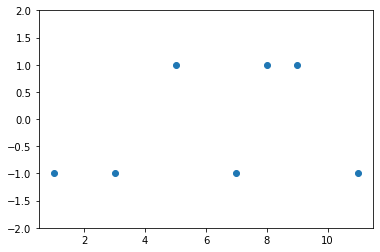

In [119]:
xs = [1,3,5,7,8,9,11]
ys = [-1,-1,1,-1,1,1,-1]
plt.plot(xs,ys,'o')
plt.ylim(-2,2)


def lagR(x1: List[float], y1: List[float]):

    list = []
    for i in x1:
        gr = [j for j in x1 if j != i ]
        list.append(helper(i, gr))

    def lagrange(x):
        return sum( y*(help(x)) for help, y in zip(list, y1))
    return lagrange

def helper(p1: float, p2: List[float]):

    def help(x):
        return np.prod([x-o for o in p2])/np.prod([p1-o for o in p2])
    return help


fff = lagR(xs, ys)
fff(2)

# Problem 5) Numerical Calculus

## Compute the numerical derivative of
$$
f(x) = x \times e^{-x}
$$
plot for x = 0 .. 1

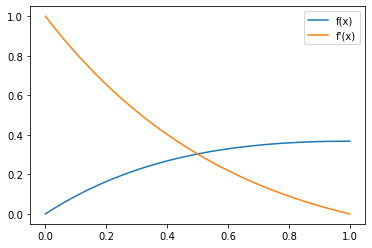

In [182]:
diff = lambda f, x, h=1e-3: (f(x+h) - f(x-h))/(2*h)

f = lambda x: x* math.exp(-x)


ttt = np.linspace(0, 1, 100)
plt.plot(ttt, [f(x)for x in ttt], label="f(x)")
plt.plot(ttt, [first_diff(f, x)for x in ttt], label="f'(x)")
plt.legend()

# Unworking code
# def diff(f,x,h):
#     return f(x+h) - f(x-h)/(2*h)

# def f(x):
#     return math.exp(-x) * x

# ttt = np.linspace(0,1,100)
# h = 1e-5

# plt.plot(ttt, [f(x) for x in ttt], label="f(x)")
# plt.plot(ttt, [diff(f,x,h) for x in ttt], label="f'(x)")
# plt.legend()



## Compute the following integral using trapezoid rule

$$
\int_0^2 x^2 e^{-x} \sin(x^2) dx
$$
use 100 pieces for your integral

In [42]:
def trap(f, x0: float, xn: float, n: int):
    h = (xn - x0)/n
    s = f(x0) + 2*sum(f(x0 + i*h)for i in range(1, n))+f(xn)
    return 1/2*h*s

def f(x):
    return (x**2) * (math.e**-x) * (math.sin(x**2))

trap(f, 0, 2, 100)

0.08053022171530362

# Problem 6) Fit the curve

Find the best least square parameter of fitting the given data with

$$
y = a \sin(x) + b \cos(x) + c
$$

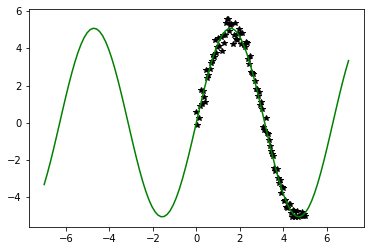

In [243]:
xs = np.array([0.        , 0.05050505, 0.1010101 , 0.15151515, 0.2020202 ,
       0.25252525, 0.3030303 , 0.35353535, 0.4040404 , 0.45454545,
       0.50505051, 0.55555556, 0.60606061, 0.65656566, 0.70707071,
       0.75757576, 0.80808081, 0.85858586, 0.90909091, 0.95959596,
       1.01010101, 1.06060606, 1.11111111, 1.16161616, 1.21212121,
       1.26262626, 1.31313131, 1.36363636, 1.41414141, 1.46464646,
       1.51515152, 1.56565657, 1.61616162, 1.66666667, 1.71717172,
       1.76767677, 1.81818182, 1.86868687, 1.91919192, 1.96969697,
       2.02020202, 2.07070707, 2.12121212, 2.17171717, 2.22222222,
       2.27272727, 2.32323232, 2.37373737, 2.42424242, 2.47474747,
       2.52525253, 2.57575758, 2.62626263, 2.67676768, 2.72727273,
       2.77777778, 2.82828283, 2.87878788, 2.92929293, 2.97979798,
       3.03030303, 3.08080808, 3.13131313, 3.18181818, 3.23232323,
       3.28282828, 3.33333333, 3.38383838, 3.43434343, 3.48484848,
       3.53535354, 3.58585859, 3.63636364, 3.68686869, 3.73737374,
       3.78787879, 3.83838384, 3.88888889, 3.93939394, 3.98989899,
       4.04040404, 4.09090909, 4.14141414, 4.19191919, 4.24242424,
       4.29292929, 4.34343434, 4.39393939, 4.44444444, 4.49494949,
       4.54545455, 4.5959596 , 4.64646465, 4.6969697 , 4.74747475,
       4.7979798 , 4.84848485, 4.8989899 , 4.94949495, 5.        ])
ys = np.array([ 0.57165901, -0.09360243,  0.28795807,  0.88787068,  1.79287899,
        1.02717709,  1.69236576,  1.36964372,  1.13638722,  2.81701582,
        2.39948268,  2.57212086,  2.88986098,  3.22731603,  3.3497681 ,
        3.67196079,  3.55137412,  4.44812755,  3.73194693,  4.06273164,
        4.55930615,  4.13741931,  4.62423087,  3.8539639 ,  4.71259408,
        4.29087629,  4.6991136 ,  5.38301494,  5.55718701,  5.56677705,
        4.9303897 ,  5.23145428,  5.29410385,  4.23233069,  4.74569643,
        5.37953057,  4.51211718,  4.47471641,  4.75439738,  5.05117004,
        4.813972  ,  4.2157389 ,  4.82244729,  4.16441266,  4.09284999,
        4.36685354,  4.2958736 ,  3.42377277,  3.16186359,  3.5666783 ,
        2.72893022,  2.66530159,  2.62043423,  2.23609816,  1.84524299,
        1.79477045,  1.43598436,  1.63982074,  0.97651032,  1.09692769,
        0.73904625, -0.19869972, -0.36163725,  0.23745736, -0.5167788 ,
       -0.60899102, -0.89671667, -1.24514583, -1.48509165, -1.69756579,
       -1.79937909, -2.43011387, -2.56405974, -2.48811509, -2.94307304,
       -3.25056817, -3.06580713, -3.74529437, -3.44586316, -3.48367058,
       -4.19332468, -4.16182805, -4.51884435, -4.59411323, -4.34453614,
       -4.35210849, -4.82427556, -5.03441833, -4.69589691, -4.71532027,
       -5.0370943 , -5.00663948, -4.74023736, -5.05009818, -4.99458561,
       -4.97125036, -4.76237684, -4.99021439, -4.90110576, -4.98613764])


def forward_elim(A, B): 
    a = A.copy()
    b = B.copy()
    nrow, _ = A.shape
    for pivot_row in range(nrow):
        p = pivot_row
        f = a[p,p]
        a[p] = a[p]/f 
        b[p] = b[p]/f
        for target_row in range(pivot_row+1, nrow):
            coeff = a[target_row, p]
     
            a[target_row] = a[target_row] -coeff * a[pivot_row]
            b[target_row] = b[target_row] -coeff * b[pivot_row]           

    return a, b

def backward_sub(A, B):
    a = A.copy()
    b = B.copy()
    nrow, _ = A.shape
    for pivot_row in range(nrow-1, -1, -1):
        for target_row in range(pivot_row-1, -1, -1):
            t = target_row
            p = pivot_row
            coeff = a[t, p]
            a[t] = a[t] - coeff * a[p]
            b[t] = b[t] - coeff * b[p]
    return b

def gauss_elim(A, B):
    return backward_sub(*forward_elim(A, B))


def best_line(xs, ys): 
    def sx(nx):
        return np.sum(xs**nx)
    def sxy(nx):
        return np.sum(ys*xs**nx)

    A = np.array([[np.sum(np.sin(xs)*np.cos(xs)), np.sum(np.cos(xs)*np.cos(xs)), np.sum(np.cos(xs))],[np.sum(np.sin(xs)*(-np.sin(xs))), np.sum(np. cos (xs) *(-np.sin(xs))), np.sum((-np.sin(xs)))],[np.sum(np.sin(xs) ),np.sum(np. cos (xs)), np.sum(xs**0)]])
    B= np.array([np.sum(ys*np. cos (xs)), np.sum(ys*(-np. sin(xs))), np.sum (ys)])
    return gauss_elim(A, B)

a,b,c = best_line(xs, ys)

plt.plot(xs, ys, '*', color = 'black')
xs = np.linspace(-7,7, 100)
aa = a*np.sin(xs)
bb = b*np.cos(xs)
plt.plot(xs, aa+ bb + c, 'green')


SyntaxError: invalid syntax (Temp/ipykernel_3816/3557571211.py, line 19)

<span style="font-size: 50px;color: dark green">Creative Zone</span>

# Problem 7) Rotated Curve with the right Area

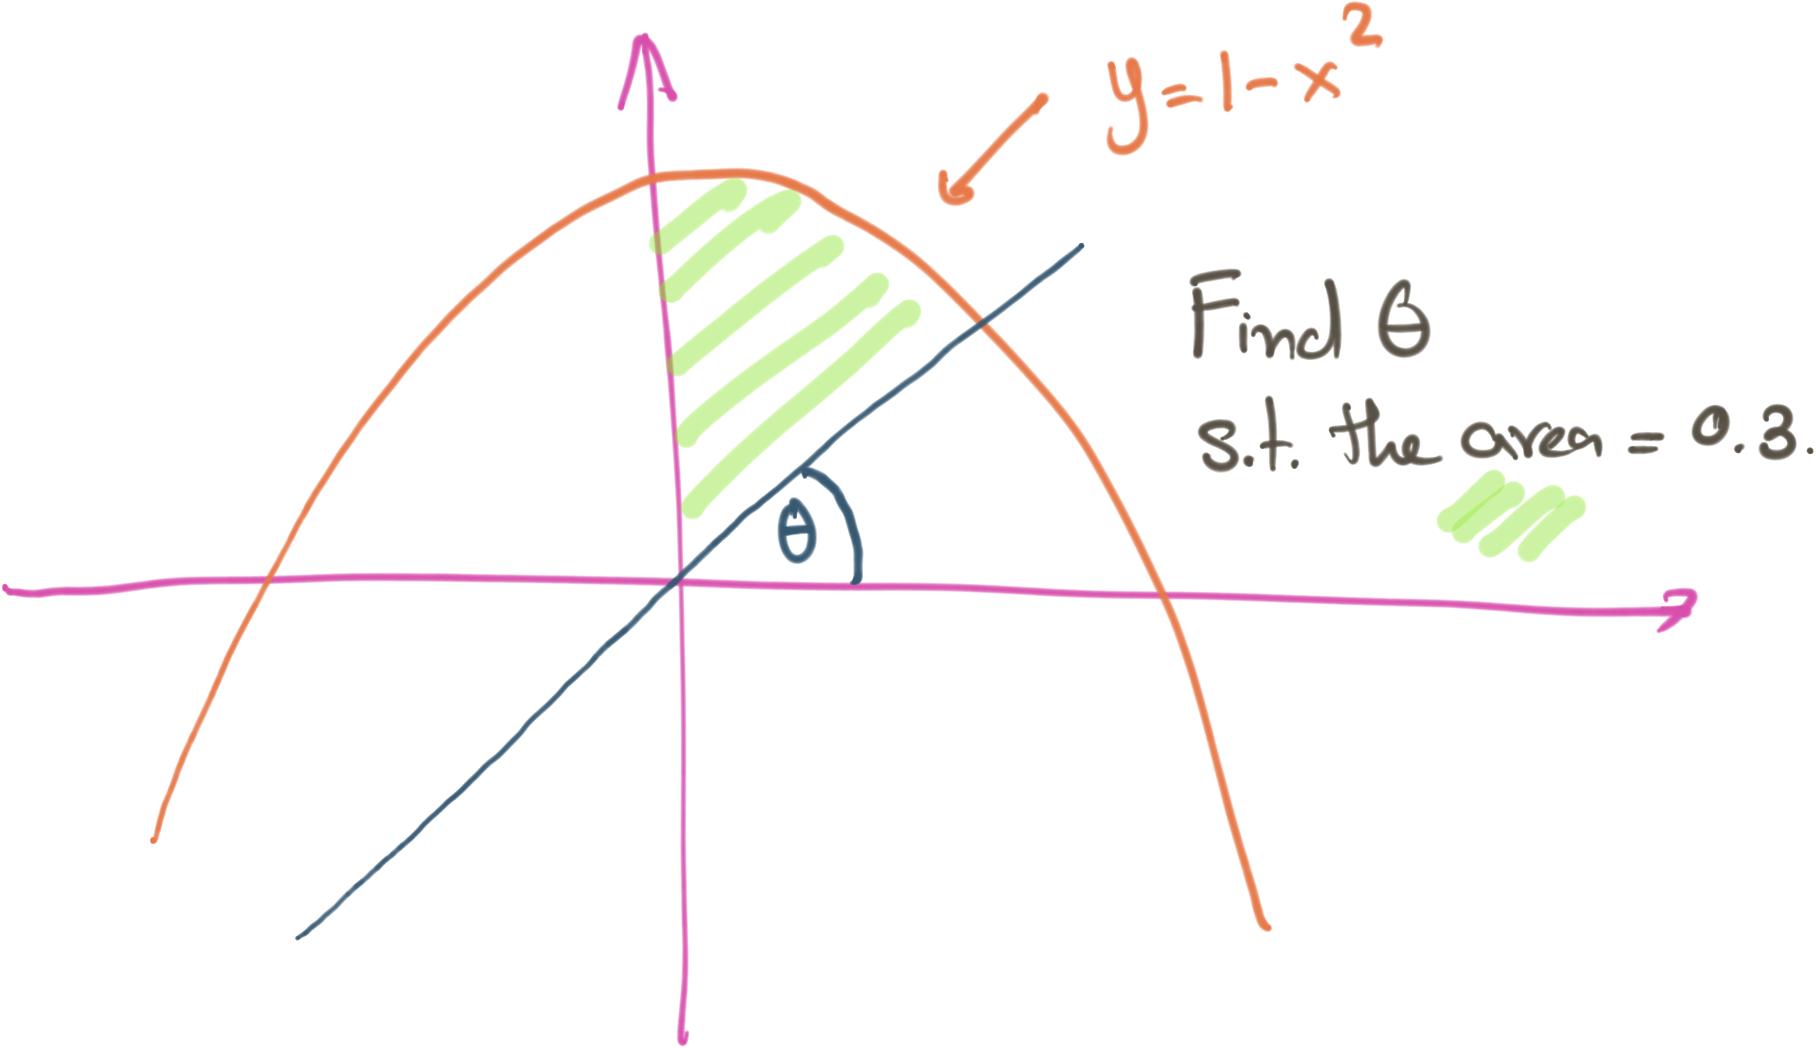

Find $\theta$ such that the green area is 0.3.

In [115]:
def bisection(a: int,b: int, f):
    c = (a+b)/2
    while f(c) != 0 and abs(f(c)) >= pow(10,-6):
        var1 = np.sign(f(a))
        if var1 != np.sign(f(c)): b = c
        else: a = c
        c = (a+b)/2

    return c

def f(x):
    return trap(line, 0, x, 1000) - ((0.5 * x * (1-pow(x,2))) + 0.3) 

def trap(f, x0: float, xn: float, n: int):
    h = (xn - x0) / n
    s = f(x0) + 2* sum(f(x0 + i * h) for i in range(1, n))+f(xn)
    return 1/2 * h * s

def line(a):
    return 1 - pow(a,2)

np.arctan((1 - pow(x,2)) / bisection(0,1,f )) * 180 / np.pi



52.138783198318

# Problem 8) Moon Landing

We are trying to find out where(x,y) the spcaecraft(orange) will end up on the moon(shown in blue).
The position sensor is not very accurate so when you read it there are a lot of noises. These are shown in orange dot. But from physics we know tha the trajectory must follow:
$$
    y = a x^2 + b x + c
$$

Let assume that the moon is a circle center at (3,3) with the radius of 2.

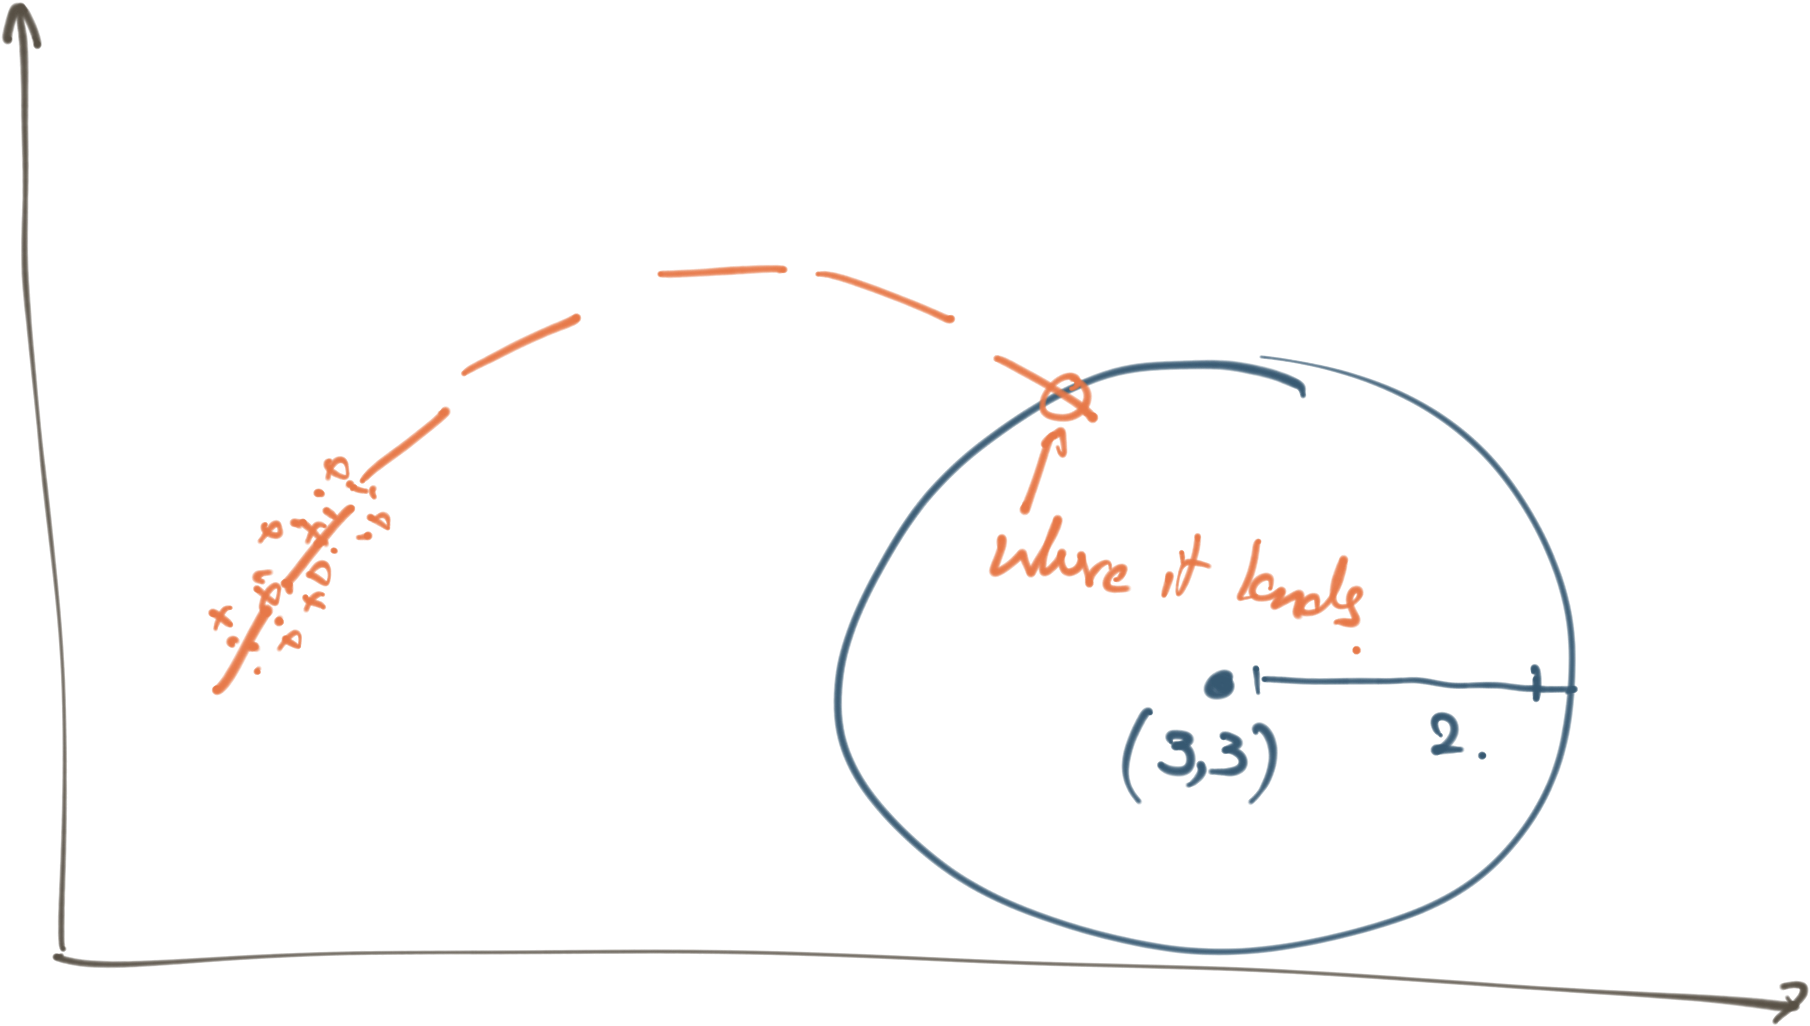

Find out where(x,y) the spacecraft would land on the moon.

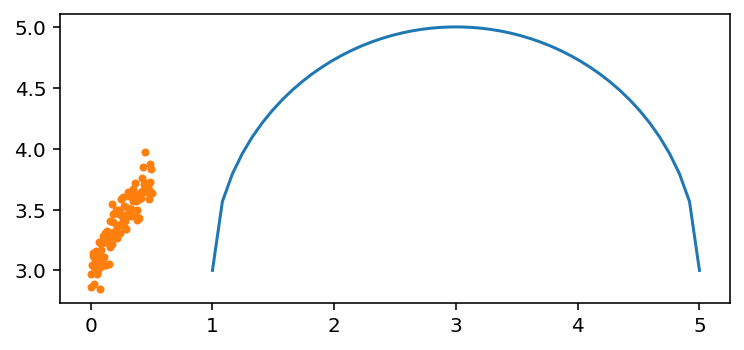

In [27]:
xs = np.linspace(1, 5)
ys = np.sqrt(2**2 - (xs-3)**2)+3
plt.plot(xs,ys)

xs = np.linspace(0,0.5,100)
ys = np.array([2.86736826, 2.97373718, 3.04313693, 3.1408188 , 3.11952285,
       2.88648899, 3.02560369, 3.07983588, 3.11890756, 3.16042444,
       3.05380265, 2.97135465, 3.00558488, 3.1068853 , 3.23524042,
       2.84324612, 3.21681244, 3.16641577, 3.03928009, 3.07076969,
       3.28141338, 3.11384464, 3.23979698, 3.30572527, 3.27875864,
       3.04590384, 3.25082765, 3.32599156, 3.22407798, 3.25939825,
       3.05258132, 3.40929123, 3.18845446, 3.30712857, 3.21424796,
       3.54857735, 3.46363739, 3.39716827, 3.2835311 , 3.32100856,
       3.28513379, 3.49651389, 3.2664614 , 3.36273143, 3.37286145,
       3.49212437, 3.45990929, 3.30806598, 3.47906656, 3.58967343,
       3.37047028, 3.39069571, 3.43241258, 3.60449359, 3.53203991,
       3.40624647, 3.34869371, 3.34091721, 3.45184084, 3.44614107,
       3.64147828, 3.51379753, 3.45101741, 3.61473274, 3.61902434,
       3.50781074, 3.44928182, 3.61828887, 3.57274548, 3.67260235,
       3.58195992, 3.58897431, 3.72166077, 3.56762309, 3.44787076,
       3.49387677, 3.41272981, 3.62042117, 3.43226127, 3.58405736,
       3.63353361, 3.63168152, 3.5953602 , 3.6493466 , 3.75803795,
       3.84532011, 3.66413613, 3.70756257, 3.97144291, 3.69371196,
       3.71578911, 3.64432351, 3.67693713, 3.68289564, 3.66235819,
       3.58280507, 3.87324691, 3.72372153, 3.83471794, 3.63946059])
plt.plot(xs, ys, '.')
plt.gca().set_aspect('equal')